In [7]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [8]:
data_path = '../generated/'
cookies_recipes = pd.read_json(data_path + 'clean_cookies.json')
kaggle_recipes = pd.read_json(data_path + 'clean_kaggle.json')
m_recipes = json.load(open(data_path + 'clean_1m.json'))
m_recipes2 = json.load(open(data_path+ '1m_usda_recipes.json'))

In [9]:
m_recipes[:2]

[['elbow macaroni',
  'american cheese',
  'celery',
  'green pepper',
  'pimento',
  'mayonnaise',
  'vinegar',
  'salt',
  'dill weed'],
 ['tomato',
  'kosher salt',
  'onion',
  'green bell pepper',
  'bell pepper',
  'yellow bell pepper',
  'cucumber',
  'olive oil',
  'basil']]

In [10]:
m_recipes2[:2]

[['elbow macaroni',
  'American cheese',
  'celery',
  'green peppers',
  'pimentos',
  'mayonnaise',
  'vinegar',
  'salt',
  'dry dill weed'],
 ['tomatoes',
  'kosher salt',
  'red onion',
  'green bell pepper',
  'red bell pepper',
  'yellow bell pepper',
  'cucumber',
  'olive oil',
  'fresh basil']]

In [3]:
all_recipes = pd.concat([cookies_recipes, kaggle_recipes, m_recipes], sort=False)

In [8]:
df_recipe = all_recipes.apply(pd.Series).stack().to_frame().reset_index()
df_recipe = df_recipe[0].to_frame()

In [10]:
df_recipe.head(20)

,0
0,butter
1,stalks celery
2,carrot
3,onion
4,green bell pepper
5,gold medalâ® all-purpose flour
6,pepper
7,rice
8,water
9,chicken broth


In [11]:
df_recipe = df_recipe.rename({0:'ingredient'}, axis=1)
df_recipe.head(5)

,ingredient
0,butter
1,stalks celery
2,carrot
3,onion
4,green bell pepper


In [12]:
len(df_recipe['ingredient'].unique())

38182

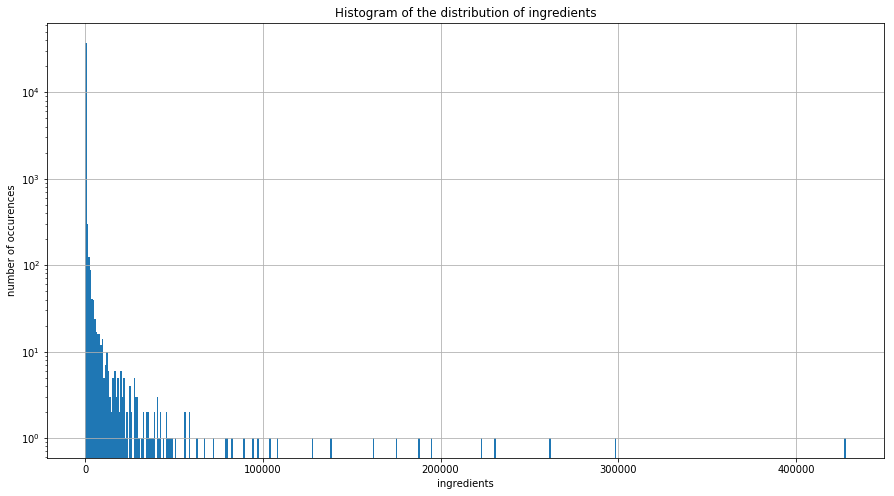

In [13]:
count_table = df_recipe['ingredient'].value_counts().to_frame().rename({'ingredient':'count'}, axis = 1)
ax = count_table['count'].hist(bins=500,figsize=(15, 8))
ax.set_yscale('log')
ax.set_title('Histogram of the distribution of ingredients')
ax.set_ylabel('number of occurences')
ax.set_xlabel('ingredients')
plt.show()

Text(0.5,1,'Ingredients occurences (x_step = 5000)')

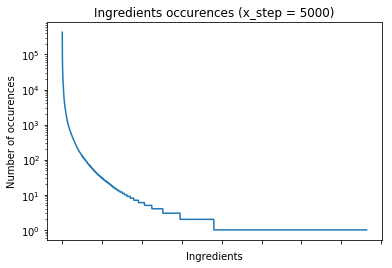

In [14]:
ax = count_table['count'].plot(logy=True)
ax.set_xlabel('Ingredients')
ax.set_ylabel('Number of occurences')
ax.set_title('Ingredients occurences (x_step = 5000)')

In [17]:
without_junk = count_table[count_table['count'] > 4]
without_junk.to_json("../generated/ingredients_count_3d.json")
count_table.to_json("../generated/ingredients_count_all_3d.json")

In [43]:
without_junk = count_table[count_table['count'] > 15]
len(count_table[count_table['count'] > 15])

6599

In [44]:
print("We keep "+ str(100*((without_junk['count'].sum()) / count_table.sum())[0])[:5]+\
      "% of the data if we discard ingredients that appear in less than 5 recipes.")
     

We keep 99.13% of the data if we discard ingredients that appear in less than 5 recipes.


In [ ]:
#count_table[count_table.index.str.contains('sil')]